In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

1. Simulate an array `X` containing 1000 data points uniformly distributed between `-4pi` and `4pi` using `np.uniform`.


In [4]:
X = np.random.uniform(-4*np.pi, 4*np.pi, size=20000).reshape(-1, 1)

f = lambda t: 2*(1 - np.abs(t)/(4*np.pi))*np.abs(np.cos(t))

2. Make a plot of the exponential of the function below, its chosen to have an interesting shape (it's very non-linear).

```python
f = lambda t: 2 * (1 - np.abs(t)/(4*np.pi)) * np.abs(np.cos(t))
```


(-0.5, 15.0)

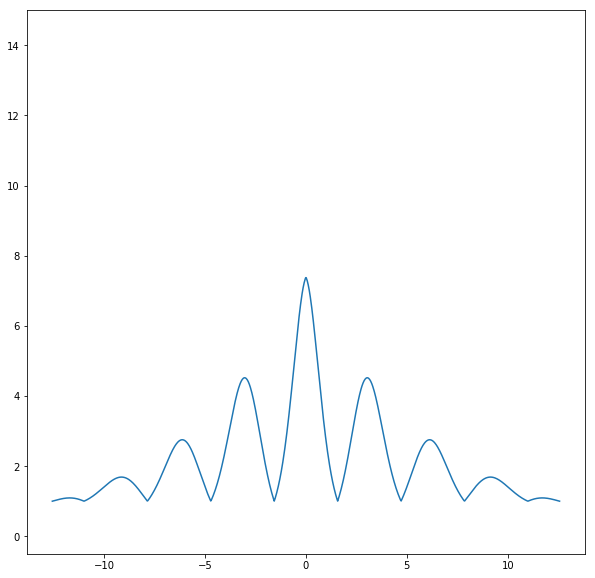

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10))
x_i = np.linspace(-4*np.pi, 4*np.pi, 1000)
ax.plot(x_i, np.exp(f(x_i)))
ax.set_ylim(-0.5, 15.0)

3. Create a vector `log_rate` as `f(X)`, this will serve as a ground truth for our model during testing.


In [124]:
log_rate = f(X)

4. Create a target array `y`, where each entry of `y` is drawn from a Poisson distribution, and the rate parameter for the Poisson distribution is the exponential of the corresponding entry of `f(x)`.  More precisely 
```python
y_i = sample_from_poisson_distribution(rate = exp(f(X_i)))
```


In [7]:
lam = np.exp(f(X)).flatten()
y = np.random.poisson(lam=lam)

5. Superimpose a scatter plot of your `y` data vs. `X` on your plot of the function `exp(f)`.  It should look something like this:

(-0.5, 15.0)

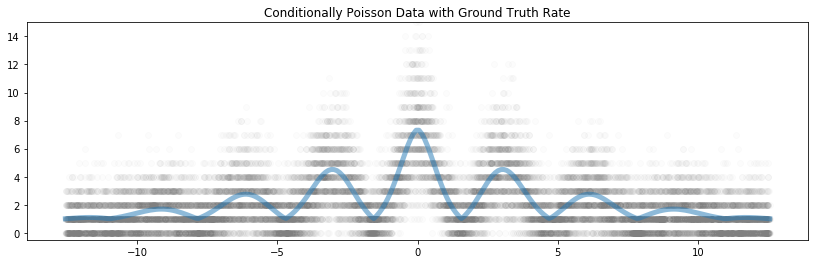

In [24]:
fig, ax = plt.subplots(1, figsize=(14,4))


t = np.linspace(-4*np.pi, 4*np.pi, num=250)

ax.plot(t, np.exp(f(t)), label="Ground Truth", linewidth=5, alpha=0.5)

ax.scatter(X.flatten(), y, color="grey", alpha=0.025, label="Poisson Data")

ax.set_title("Conditionally Poisson Data with Ground Truth Rate")

ax.set_ylim(-0.5, 15.0)


(-0.5, 15.0)

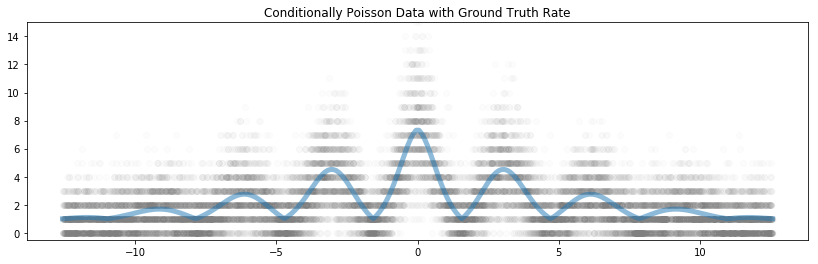

In [16]:


fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(X.flatten(), y, color="grey", alpha=0.025, label="Poisson Data")

t = np.linspace(-4*np.pi, 4*np.pi, num=250)

ax.plot(t, np.exp(f(t)), label="Ground Truth", linewidth=5, alpha=0.5)

ax.set_title("Conditionally Poisson Data with Ground Truth Rate")

ax.set_ylim(-0.5, 15.0)



## Exploring the DecisionTreeRegressor Object

2. Fit a `DecisionTreeRegressor` to the dataset you generated above, using `max_depth=3`.  Call the `apply` method on your training data: `leaves = fit_decision_tree.apply(X)`.  Are the results consistent with your hypothesis?

In [127]:
regressor = DecisionTreeRegressor(max_depth=3)

In [128]:
log_rate.reshape(-1)

array([1.28403080e+00, 6.30138472e-01, 1.50728777e+00, 1.56475614e+00,
       1.66235503e+00, 9.85349918e-01, 1.81611144e-01, 1.47031657e+00,
       9.99757924e-01, 5.14713843e-01, 1.84610771e+00, 3.12444717e-01,
       4.98680916e-02, 9.90128576e-01, 1.50722728e+00, 4.22555962e-02,
       9.96900030e-01, 9.91825447e-01, 7.86590892e-02, 5.57657151e-01,
       2.65979439e-01, 8.69151720e-02, 2.63864283e-02, 7.88533931e-01,
       5.17395502e-01, 8.91023048e-02, 6.16506220e-01, 8.61336412e-02,
       1.27499957e+00, 9.06241154e-01, 5.08034651e-01, 1.22671666e+00,
       5.60430579e-01, 1.49439891e+00, 5.29385008e-02, 5.83363070e-01,
       6.30357098e-01, 3.23934281e-01, 8.64928396e-01, 5.22980830e-01,
       7.69923245e-01, 2.35057109e-01, 1.92122991e+00, 8.88564196e-02,
       1.18425329e+00, 8.06185172e-02, 1.50667581e+00, 1.40959059e+00,
       1.06427771e+00, 3.83609996e-02, 7.99139932e-01, 5.72666480e-01,
       2.08065778e-01, 2.34547398e-02, 1.00897978e+00, 2.19200937e-01,
      

In [136]:
regressor.fit(X, y_i)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [130]:
y_i.shape

(1000,)

In [131]:
X.shape

(1000,)

In [139]:
X = X.reshape(-1,1)

In [140]:
type(X)

numpy.ndarray